In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (16, 9)

# EDA

## EDA bookings

In [3]:
df_bookings = pd.read_csv("data/bookings.csv")
df_cust = pd.read_csv("data/customer_information.csv")
df_mapping = pd.read_csv("data/mapping_account_to_customer.csv")
df_trx_tp = pd.read_csv("data/transaction_type_descriptions.csv")

In [4]:
df_mapping.head()

,account,customer
0,74bcb6cecf3262d65e3b0d699d54a02c,61af663c-ed2e-4bcd-8c06-df90aa1c4023
1,ece1ff028280aebae9edfb7e036d5af2,e9d68f23-b489-4070-b914-f8a8bea4ff31
2,3933695939df3216249172b2c6627805,806a29ad-f6b2-4778-be50-8d4d293a60be
3,2101cdde2c259f7dd995b5d659a16fc4,440dd09f-c2e8-4fc2-b649-6cdefca54576
4,4992ed79597fd9cc8b610685c9c4fc4d,0722ab3c-18c3-4aa9-a013-5044a041301d


In [5]:
df_bookings.head()
# we note negative values for booking_amount -> make crdt/dbit indicator

,account,transaction_type_code,booking_amount,booking_datetime_utc,counterparty_iban,counterparty_name
0,8cb467ebb0c9ab36c2e8b16f641261da,po,10.62,2024-01-29 14:07:46,NLFAKEYSXS4593365850,9fd29e915875d3483d957a80b708be2e
1,567836a47eeccfa4a3bf07eb76555df3,pt,-241.94,2023-05-10 19:56:14,NLFAKELPTK6013528475,91816c8c2cd84d5c749cadef5a7df89a
2,e8b94ce0426594b226e260d2fffc33f6,po,162.49,2023-04-23 22:05:01,NLFAKEGDAF5939009823,cf2d659764891c71be7573f6b9acbf92
3,57f5f510b4ca6d69fac0e18ab2d38313,pt,552.06,2023-10-26 12:58:47,NLFAKESQCM9853487776,2b885cd569a8d69e217fd773bcb87b9d
4,e23fe9638bfa32c3c8eddc856c77443f,pt,-321.83,2024-04-03 01:55:07,NLFAKEBOMU3100767392,48c2ba56a207ad4041b3d2e7b6d2ca6a


In [6]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account                6717 non-null   object 
 1   transaction_type_code  6717 non-null   object 
 2   booking_amount         6717 non-null   float64
 3   booking_datetime_utc   6717 non-null   object 
 4   counterparty_iban      6604 non-null   object 
 5   counterparty_name      6604 non-null   object 
dtypes: float64(1), object(5)
memory usage: 315.0+ KB


In [7]:
df_bookings['crdt_dbit'] = df_bookings['booking_amount'].apply(lambda x: 'dbit' if x<0 else 'crdt')
df_bookings['booking_amount'] = df_bookings['booking_amount'].abs()

In [8]:
df_bookings.head()

,account,transaction_type_code,booking_amount,booking_datetime_utc,counterparty_iban,counterparty_name,crdt_dbit
0,8cb467ebb0c9ab36c2e8b16f641261da,po,10.62,2024-01-29 14:07:46,NLFAKEYSXS4593365850,9fd29e915875d3483d957a80b708be2e,crdt
1,567836a47eeccfa4a3bf07eb76555df3,pt,241.94,2023-05-10 19:56:14,NLFAKELPTK6013528475,91816c8c2cd84d5c749cadef5a7df89a,dbit
2,e8b94ce0426594b226e260d2fffc33f6,po,162.49,2023-04-23 22:05:01,NLFAKEGDAF5939009823,cf2d659764891c71be7573f6b9acbf92,crdt
3,57f5f510b4ca6d69fac0e18ab2d38313,pt,552.06,2023-10-26 12:58:47,NLFAKESQCM9853487776,2b885cd569a8d69e217fd773bcb87b9d,crdt
4,e23fe9638bfa32c3c8eddc856c77443f,pt,321.83,2024-04-03 01:55:07,NLFAKEBOMU3100767392,48c2ba56a207ad4041b3d2e7b6d2ca6a,dbit


<Axes: xlabel='booking_amount', ylabel='Count'>

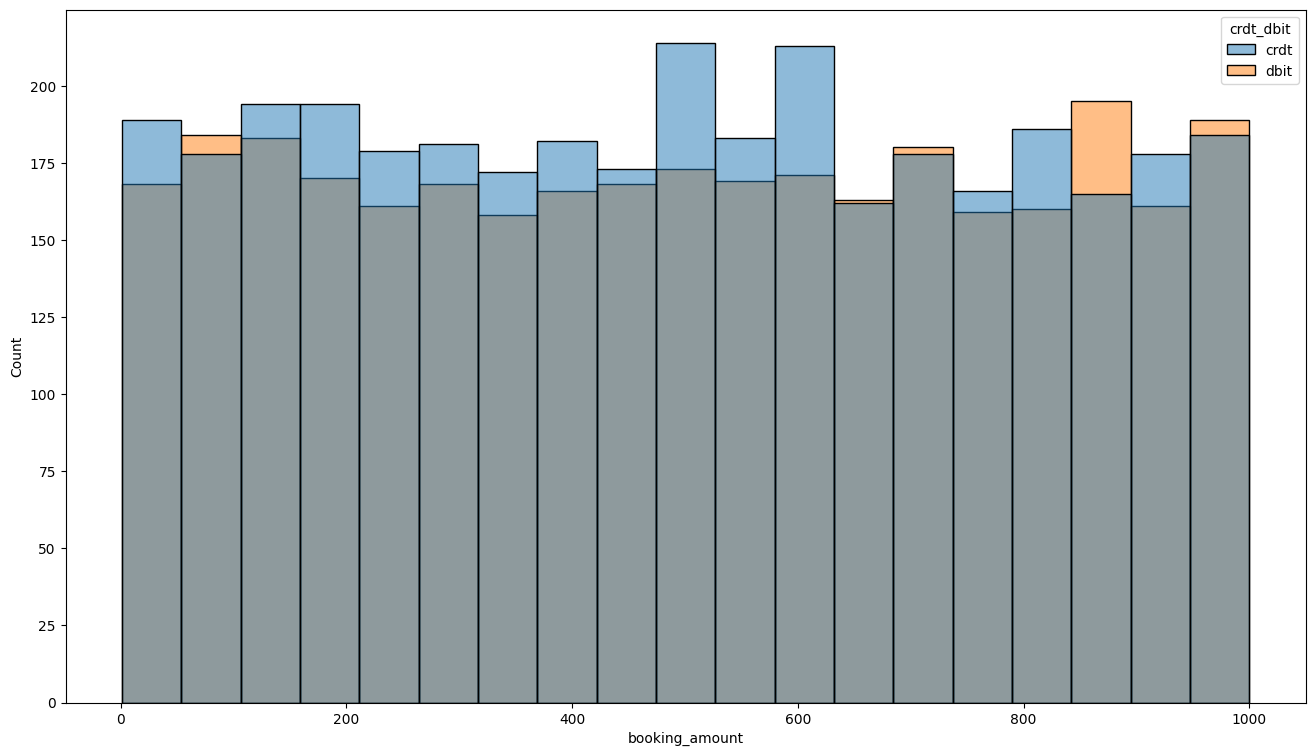

In [9]:
sns.histplot(data=df_bookings, x='booking_amount', hue = 'crdt_dbit')
#distribution of bookings looks uniform

<Axes: xlabel='booking_amount', ylabel='Count'>

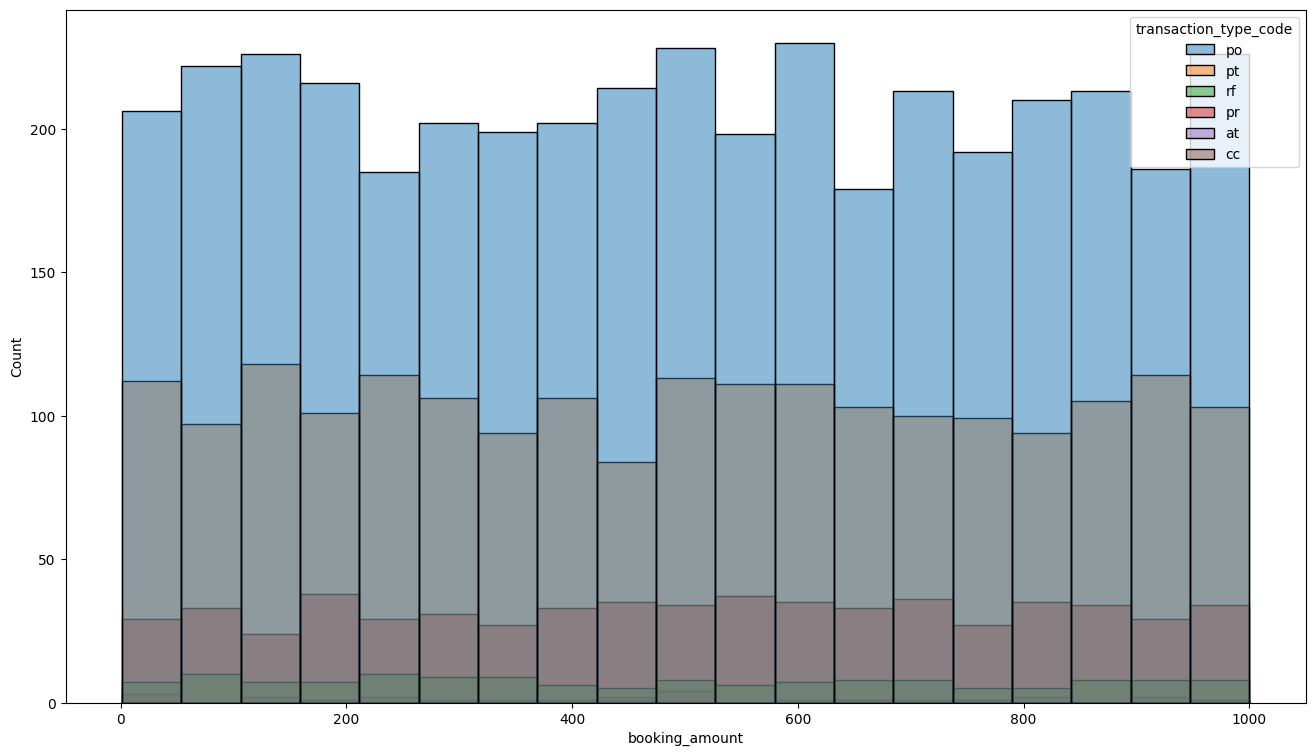

In [10]:
sns.histplot(data=df_bookings, x='booking_amount', hue = 'transaction_type_code')
# we can clearly separate amounts into groups 

In [11]:
df_bookings['counterparty_iban'].value_counts()
# we note one counterparty_iban is a large outlier, 1771 unique counterparties

counterparty_iban
NLFAKEYAPJ0323111474        947
NLFAKEDTMJ6592739193        194
NLFAKEJKRW6894469052         87
NLFAKEAARQ9633806702         70
DEFAKE408179006595163911     65
                           ... 
NLFAKEKKOR9950669748          1
NLFAKEYQXY8833811521          1
NLFAKEFFQK8248408585          1
NLFAKEVEKE2745695810          1
NLFAKEQVWW9341141973          1
Name: count, Length: 1771, dtype: int64

In [12]:
df_bookings['counterparty_name'].value_counts()

counterparty_name
513b47644939b28fee00b21888e0ec3b    947
3ebc651fd64cf3c4dcb0e3b3cff036f4    194
fb7dcf70b22c1efc78b5ccc8f29d8453     87
86deda3fc7ffea286d8b2d11611ae642     70
f71bc9103fbe23fc95ce66f8bc5fc968     66
                                   ... 
9c7125347549f85b60eb29bedc66fae5      1
b6e5cc71dcba92a5437ca03447fa7328      1
53552860f8e9d4a758e824316498c143      1
76d3fc6b3b19cbd30a3a17007ff7150c      1
8b6d3f6ad663a706901ef1fde84b5912      1
Name: count, Length: 1562, dtype: int64

In [13]:
counts = (
    df_bookings
        .groupby(['counterparty_name','counterparty_iban'])
        .size()
        .to_frame("counts")
        .sort_values("counts", ascending=False)
)

counts
# we note one counterparty is a large outlier, 1771 unique counterparties

,,counts
counterparty_name,counterparty_iban,
513b47644939b28fee00b21888e0ec3b,NLFAKEYAPJ0323111474,947
3ebc651fd64cf3c4dcb0e3b3cff036f4,NLFAKEDTMJ6592739193,194
fb7dcf70b22c1efc78b5ccc8f29d8453,NLFAKEJKRW6894469052,87
86deda3fc7ffea286d8b2d11611ae642,NLFAKEAARQ9633806702,70
b207e03abf14e77f533f889bcde231bc,DEFAKE408179006595163911,65
...,...,...
0386ce4c839bc18742798c4101df2c2f,NLFAKECAGL8163937779,1
044079dbe08658017e066c0dfe057991,NLFAKEZEQF9092056803,1
0449a9524e9421be69c63a117529fe95,NLFAKEHOHC3191490052,1


<Axes: xlabel='counts', ylabel='Count'>

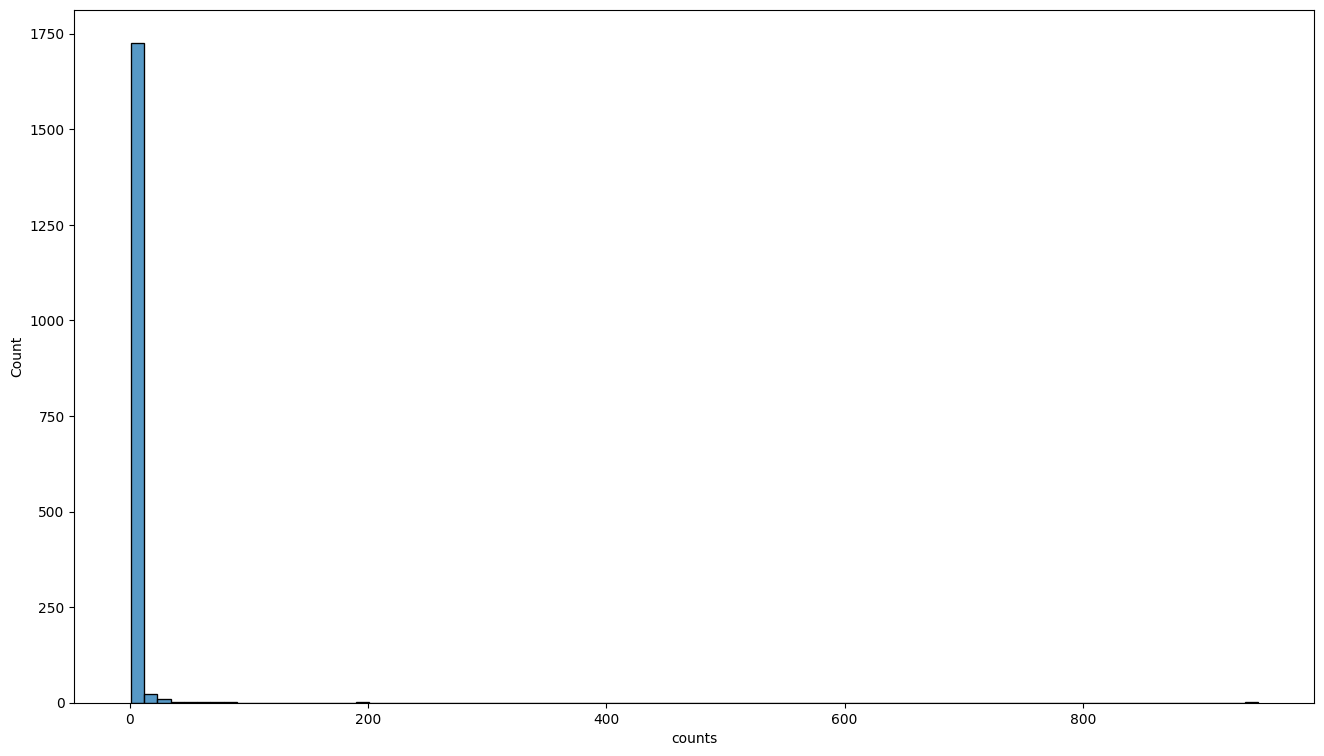

In [14]:
sns.histplot(data = counts, x='counts') 

In [21]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account                6717 non-null   object 
 1   transaction_type_code  6717 non-null   object 
 2   booking_amount         6717 non-null   float64
 3   booking_datetime_utc   6717 non-null   object 
 4   counterparty_iban      6604 non-null   object 
 5   counterparty_name      6604 non-null   object 
 6   crdt_dbit              6717 non-null   object 
dtypes: float64(1), object(6)
memory usage: 367.5+ KB


In [22]:
df_bookings_cleaned = df_bookings.dropna()

In [24]:
df_bookings.to_csv("data/df_bookings_cleaned.csv", index=False)

In [28]:
df_bookings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6604 entries, 0 to 6716
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account                6604 non-null   object 
 1   transaction_type_code  6604 non-null   object 
 2   booking_amount         6604 non-null   float64
 3   booking_datetime_utc   6604 non-null   object 
 4   counterparty_iban      6604 non-null   object 
 5   counterparty_name      6604 non-null   object 
 6   crdt_dbit              6604 non-null   object 
dtypes: float64(1), object(6)
memory usage: 412.8+ KB


## EDA customer_information

In [15]:
df_cust.head()

,customer,date_of_birth,bank_code,gender,country_of_birth_code,housing_tenure_type,social_status,country_of_residence_code,customer_relation_status_type
0,0534a101-8ddc-4719-81f3-8dd4fd034ada,1989-03-13,3773,Male,NL,Rents house,Unemployed,NL,Customer
1,a9151364-778a-469f-8b68-d94d40da9c7d,1996-10-12,1476,Male,NaN,Does not own house (no longer active),Unknown,NL,Prospective customer
2,7317591a-3283-4aa4-a212-ab7c9d361cb6,1951-05-28,3264,Female,NaN,Lives in,Unemployed,NL,Prospective customer
3,bfddc3d9-9ee3-4c2a-b94d-62046808593f,1968-07-14,1378,Female,NL,Does not own house (no longer active),Unknown,NL,Prospective customer
4,32d4d3a5-98dd-4c3c-a4ce-b832c8776e4b,1996-03-31,1161,Female,NaN,Owns house,Unknown,NO,Ex customer


In [16]:
df_cust.info() #not a lot of nulls, so we can just dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer                       3952 non-null   object
 1   date_of_birth                  3943 non-null   object
 2   bank_code                      3952 non-null   int64 
 3   gender                         3952 non-null   object
 4   country_of_birth_code          3374 non-null   object
 5   housing_tenure_type            3952 non-null   object
 6   social_status                  3952 non-null   object
 7   country_of_residence_code      3952 non-null   object
 8   customer_relation_status_type  3952 non-null   object
dtypes: int64(1), object(8)
memory usage: 278.0+ KB


In [17]:
df_cust['housing_tenure_type'].value_counts() # one hot encode this

housing_tenure_type
Unknown                                  1369
Owns house                               1173
Does not own house (no longer active)     681
Lives in                                  442
Rents house                               287
Name: count, dtype: int64

In [18]:
df_cust['bank_code'].value_counts() #84 bank codes, bit too many to get good clustering from this?

bank_code
3642    89
1582    81
3249    73
1471    73
3013    71
        ..
3400    27
3212    25
3473    24
3508    16
1519     9
Name: count, Length: 84, dtype: int64

<Axes: xlabel='social_status', ylabel='Count'>

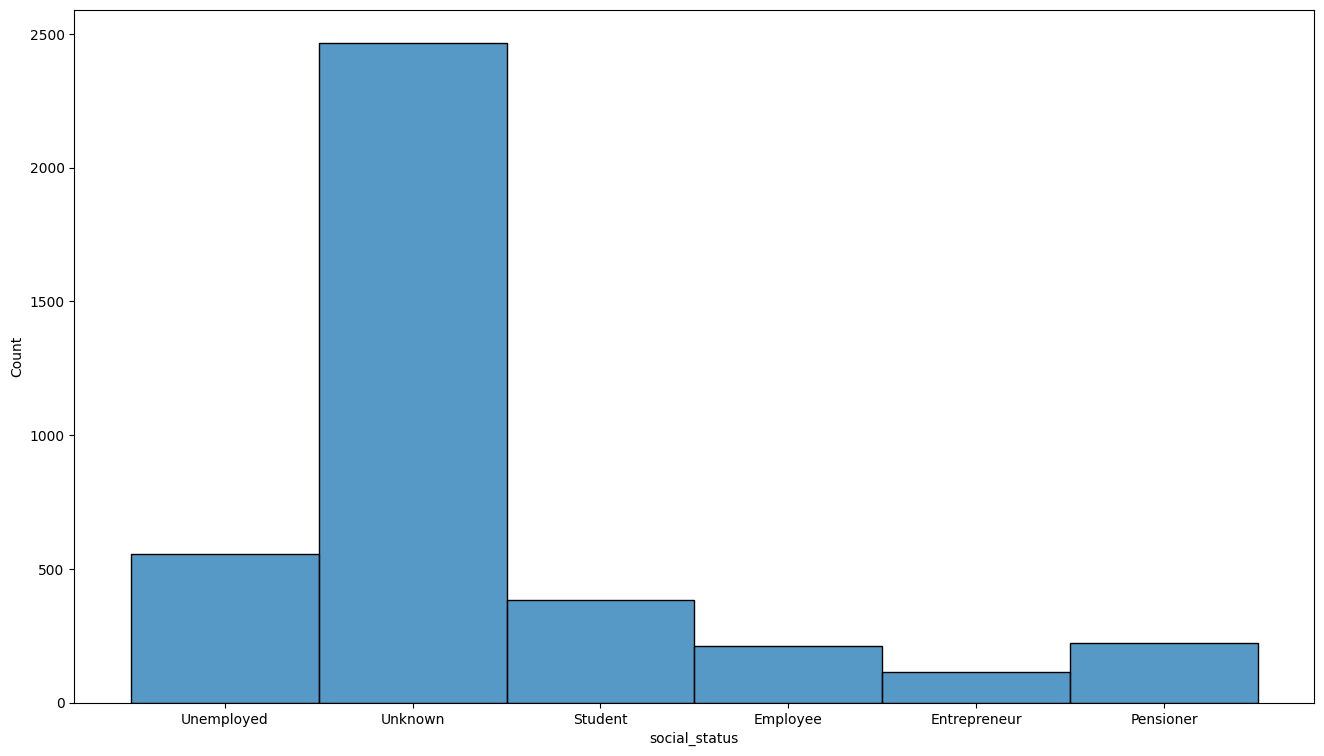

In [19]:
sns.histplot(data=df_cust, x = 'social_status') #largely unknown, not very informative

<Axes: xlabel='gender', ylabel='Count'>

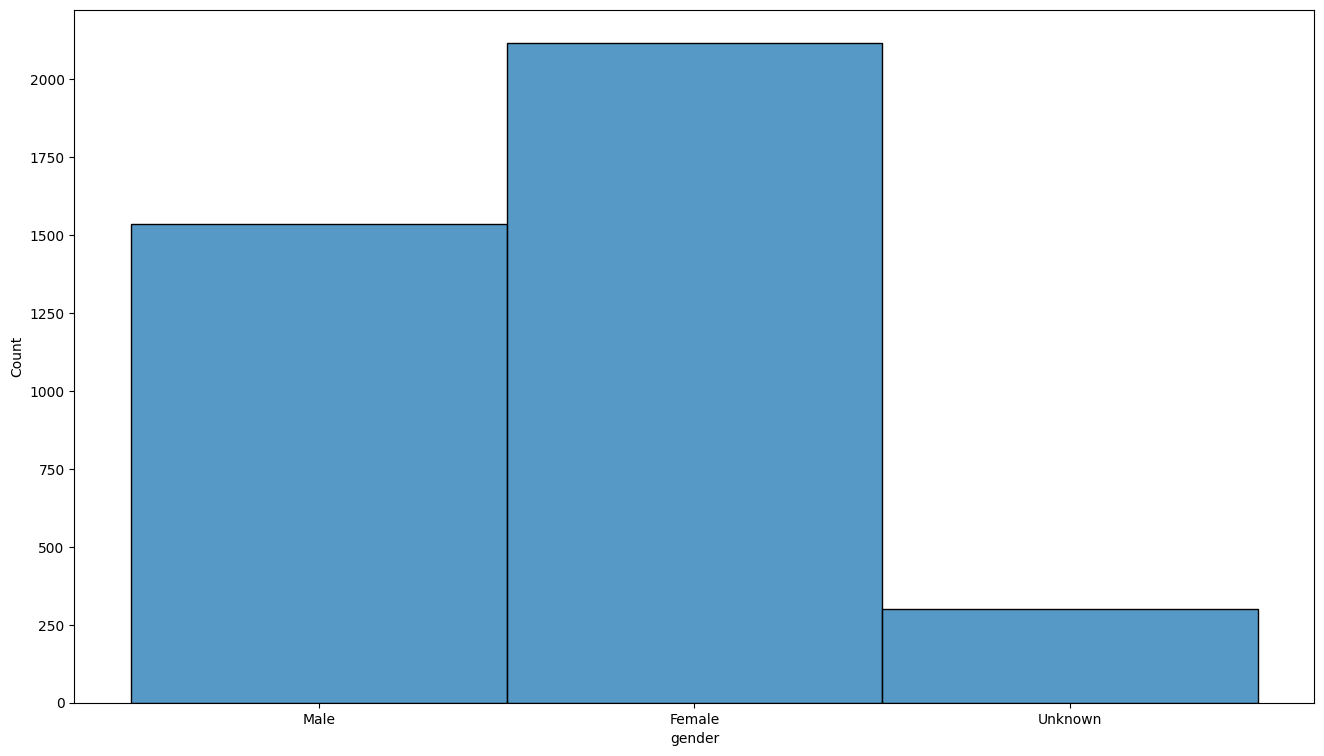

In [20]:
sns.histplot(data=df_cust, x = 'gender')

In [29]:
df_cust['country_of_birth_code'] = df_cust["country_of_birth_code"].fillna("unknown")


In [31]:
df_cust_cleaned = df_cust.dropna()

In [32]:
df_cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 0 to 3951
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer                       3943 non-null   object
 1   date_of_birth                  3943 non-null   object
 2   bank_code                      3943 non-null   int64 
 3   gender                         3943 non-null   object
 4   country_of_birth_code          3943 non-null   object
 5   housing_tenure_type            3943 non-null   object
 6   social_status                  3943 non-null   object
 7   country_of_residence_code      3943 non-null   object
 8   customer_relation_status_type  3943 non-null   object
dtypes: int64(1), object(8)
memory usage: 308.0+ KB


In [33]:
df_cust_cleaned.to_csv("data/customer_information_cleaned.csv")